## ICR - Identifying Age-Related Conditions

The primary objective of this competition is to develop a predictive model that can determine whether a person has one or more of three specified medical conditions (Class 1) or none of them (Class 0). The aim is to leverage health characteristics data to enhance the accuracy and efficiency of medical condition diagnosis.

Aging is associated with various health risks, including heart disease, dementia, and arthritis. With the rise of bioinformatics, researchers are seeking innovative ways to address age-related health issues. Predictive modeling plays a crucial role by enabling the analysis of key health characteristics without requiring extensive and intrusive patient data collection.

This competition seeks to improve prediction accuracy, which is vital in medical applications where decisions can significantly impact patient lives.
Privacy Protection: By using predictive models, researchers can maintain patient confidentiality while gathering essential health information.
Advancing Bioinformatics: Participant contributions may lead to breakthroughs in understanding the relationship between health metrics and medical conditions, ultimately aiding in the development of preventive and regenerative healthcare approaches.

Participants will work with a dataset that includes various health measurements.By participating, you will not only enhance your data science skills but also contribute to the critical field of bioinformatics, potentially impacting the lives of many individuals facing age-related health challenges.

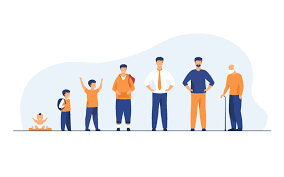

<a href='https://www.kaggle.com/competitions/icr-identify-age-related-conditions' target=_blank>You can find the competition here</a>

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv
/kaggle/input/icr-identify-age-related-conditions/greeks.csv
/kaggle/input/icr-identify-age-related-conditions/train.csv
/kaggle/input/icr-identify-age-related-conditions/test.csv


## Import Libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [131]:
train=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test=pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
#Reading the file.

## EDA 

In [8]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [9]:
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
train.isnull().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [132]:
train=train.dropna()

In [134]:
test.isnull().sum()

Id     0
AB     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
DE     0
DF     0
DH     0
DI     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
GL     0
dtype: int64

In [10]:
train.shape, test.shape

((617, 58), (5, 57))

In [135]:
df=pd.concat([train,test])

In [89]:
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1.0
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0.0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0.0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0.0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1.0


In [166]:
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,...,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,548.000000
mean,0.458675,3471.173229,117.743223,37.627847,10.104230,5.331188,0.062402,10.731070,8.639287,5334.153684,...,4.562986,3.712542,0.419840,20.367057,131.742920,15829.523742,31.081103,52.290811,9.362808,0.186131
std,0.395694,2295.190403,134.390725,68.323728,10.892239,2.546796,0.440168,4.507279,68.805293,3191.794259,...,9.064816,52.959283,1.370790,10.213677,151.358030,20049.960257,10.273653,37.451497,10.467366,0.389568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243561,2185.518940,85.200147,11.957517,8.138688,4.048563,0.025578,8.444680,1.229900,4151.763800,...,0.173229,0.497060,0.067730,13.906490,72.611063,3115.934811,24.926979,22.847076,0.145340,0.000000
50%,0.341840,3070.404040,85.200147,20.065463,8.138688,4.934463,0.025578,10.669286,1.229900,4974.342290,...,2.076130,1.144920,0.243828,18.613302,72.611063,8524.370502,30.432198,43.330484,0.594000,0.000000
75%,0.546944,4348.610530,106.872494,36.860494,8.138688,6.183582,0.036845,13.177482,5.330738,5999.962660,...,6.015965,1.503940,0.521521,25.022380,124.607987,21673.012540,36.778364,70.447080,21.978000,0.000000
max,4.435374,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 553 entries, 0 to 4
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      553 non-null    object 
 1   AB      553 non-null    float64
 2   AF      553 non-null    float64
 3   AH      553 non-null    float64
 4   AM      553 non-null    float64
 5   AR      553 non-null    float64
 6   AX      553 non-null    float64
 7   AY      553 non-null    float64
 8   AZ      553 non-null    float64
 9   BC      553 non-null    float64
 10  BD      553 non-null    float64
 11  BN      553 non-null    float64
 12  BP      553 non-null    float64
 13  BQ      553 non-null    float64
 14  BR      553 non-null    float64
 15  BZ      553 non-null    float64
 16  CB      553 non-null    float64
 17  CC      553 non-null    float64
 18  CD      553 non-null    float64
 19  CF      553 non-null    float64
 20  CH      553 non-null    float64
 21  CL      553 non-null    float64
 22  CR      5

In [167]:
df.corr(numeric_only=True)

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
AB,1.000000,0.268692,0.303527,0.541858,0.139100,0.504819,0.018486,0.201457,0.417169,0.353207,...,0.104060,-0.001421,0.032432,0.368035,-0.007849,-0.009350,0.165923,0.019741,-0.086955,0.314508
AF,0.268692,1.000000,0.053185,0.191626,0.048555,0.239672,0.044470,0.242186,0.063256,0.059463,...,0.185261,0.011068,-0.000990,0.086689,0.072672,-0.166742,0.205003,0.168063,-0.152395,0.303462
AH,0.303527,0.053185,1.000000,0.142388,0.772646,0.045299,0.056251,0.114082,0.369982,0.224326,...,-0.027951,-0.009833,0.020456,0.186553,0.017939,-0.025677,-0.011780,-0.060326,0.034671,0.048066
AM,0.541858,0.191626,0.142388,1.000000,0.127689,0.253659,0.090477,0.142670,0.357161,0.311974,...,0.097425,-0.010120,0.038397,0.231081,0.000628,-0.020005,0.104220,0.111975,-0.070910,0.268097
AR,0.139100,0.048555,0.772646,0.127689,1.000000,0.035699,0.102617,0.102047,0.075515,0.009782,...,0.032235,-0.007455,0.069294,0.011497,0.044417,0.026959,-0.102701,0.073271,0.030903,0.069562
AX,0.504819,0.239672,0.045299,0.253659,0.035699,1.000000,0.024558,0.340028,0.092647,0.164618,...,-0.030516,-0.018834,0.054102,0.277432,0.106249,0.132152,0.161617,0.123804,0.057835,0.123347
AY,0.018486,0.044470,0.056251,0.090477,0.102617,0.024558,1.000000,0.038883,0.132214,0.508979,...,-0.029114,-0.002903,-0.009971,0.030691,0.004176,-0.009153,0.203066,0.022148,0.065607,0.084060
AZ,0.201457,0.242186,0.114082,0.142670,0.102047,0.340028,0.038883,1.000000,0.035049,0.164496,...,-0.053567,-0.010962,0.023217,0.264999,0.019023,0.206648,0.173679,0.065601,0.101853,0.021859
BC,0.417169,0.063256,0.369982,0.357161,0.075515,0.092647,0.132214,0.035049,1.000000,0.753928,...,-0.017014,0.034172,0.018147,0.437423,0.052862,-0.048993,0.135860,-0.024394,0.036628,0.158355
BD,0.353207,0.059463,0.224326,0.311974,0.009782,0.164618,0.508979,0.164496,0.753928,1.000000,...,-0.010560,-0.010854,0.023932,0.475956,0.007622,0.009398,0.270007,-0.000033,0.023690,0.113988


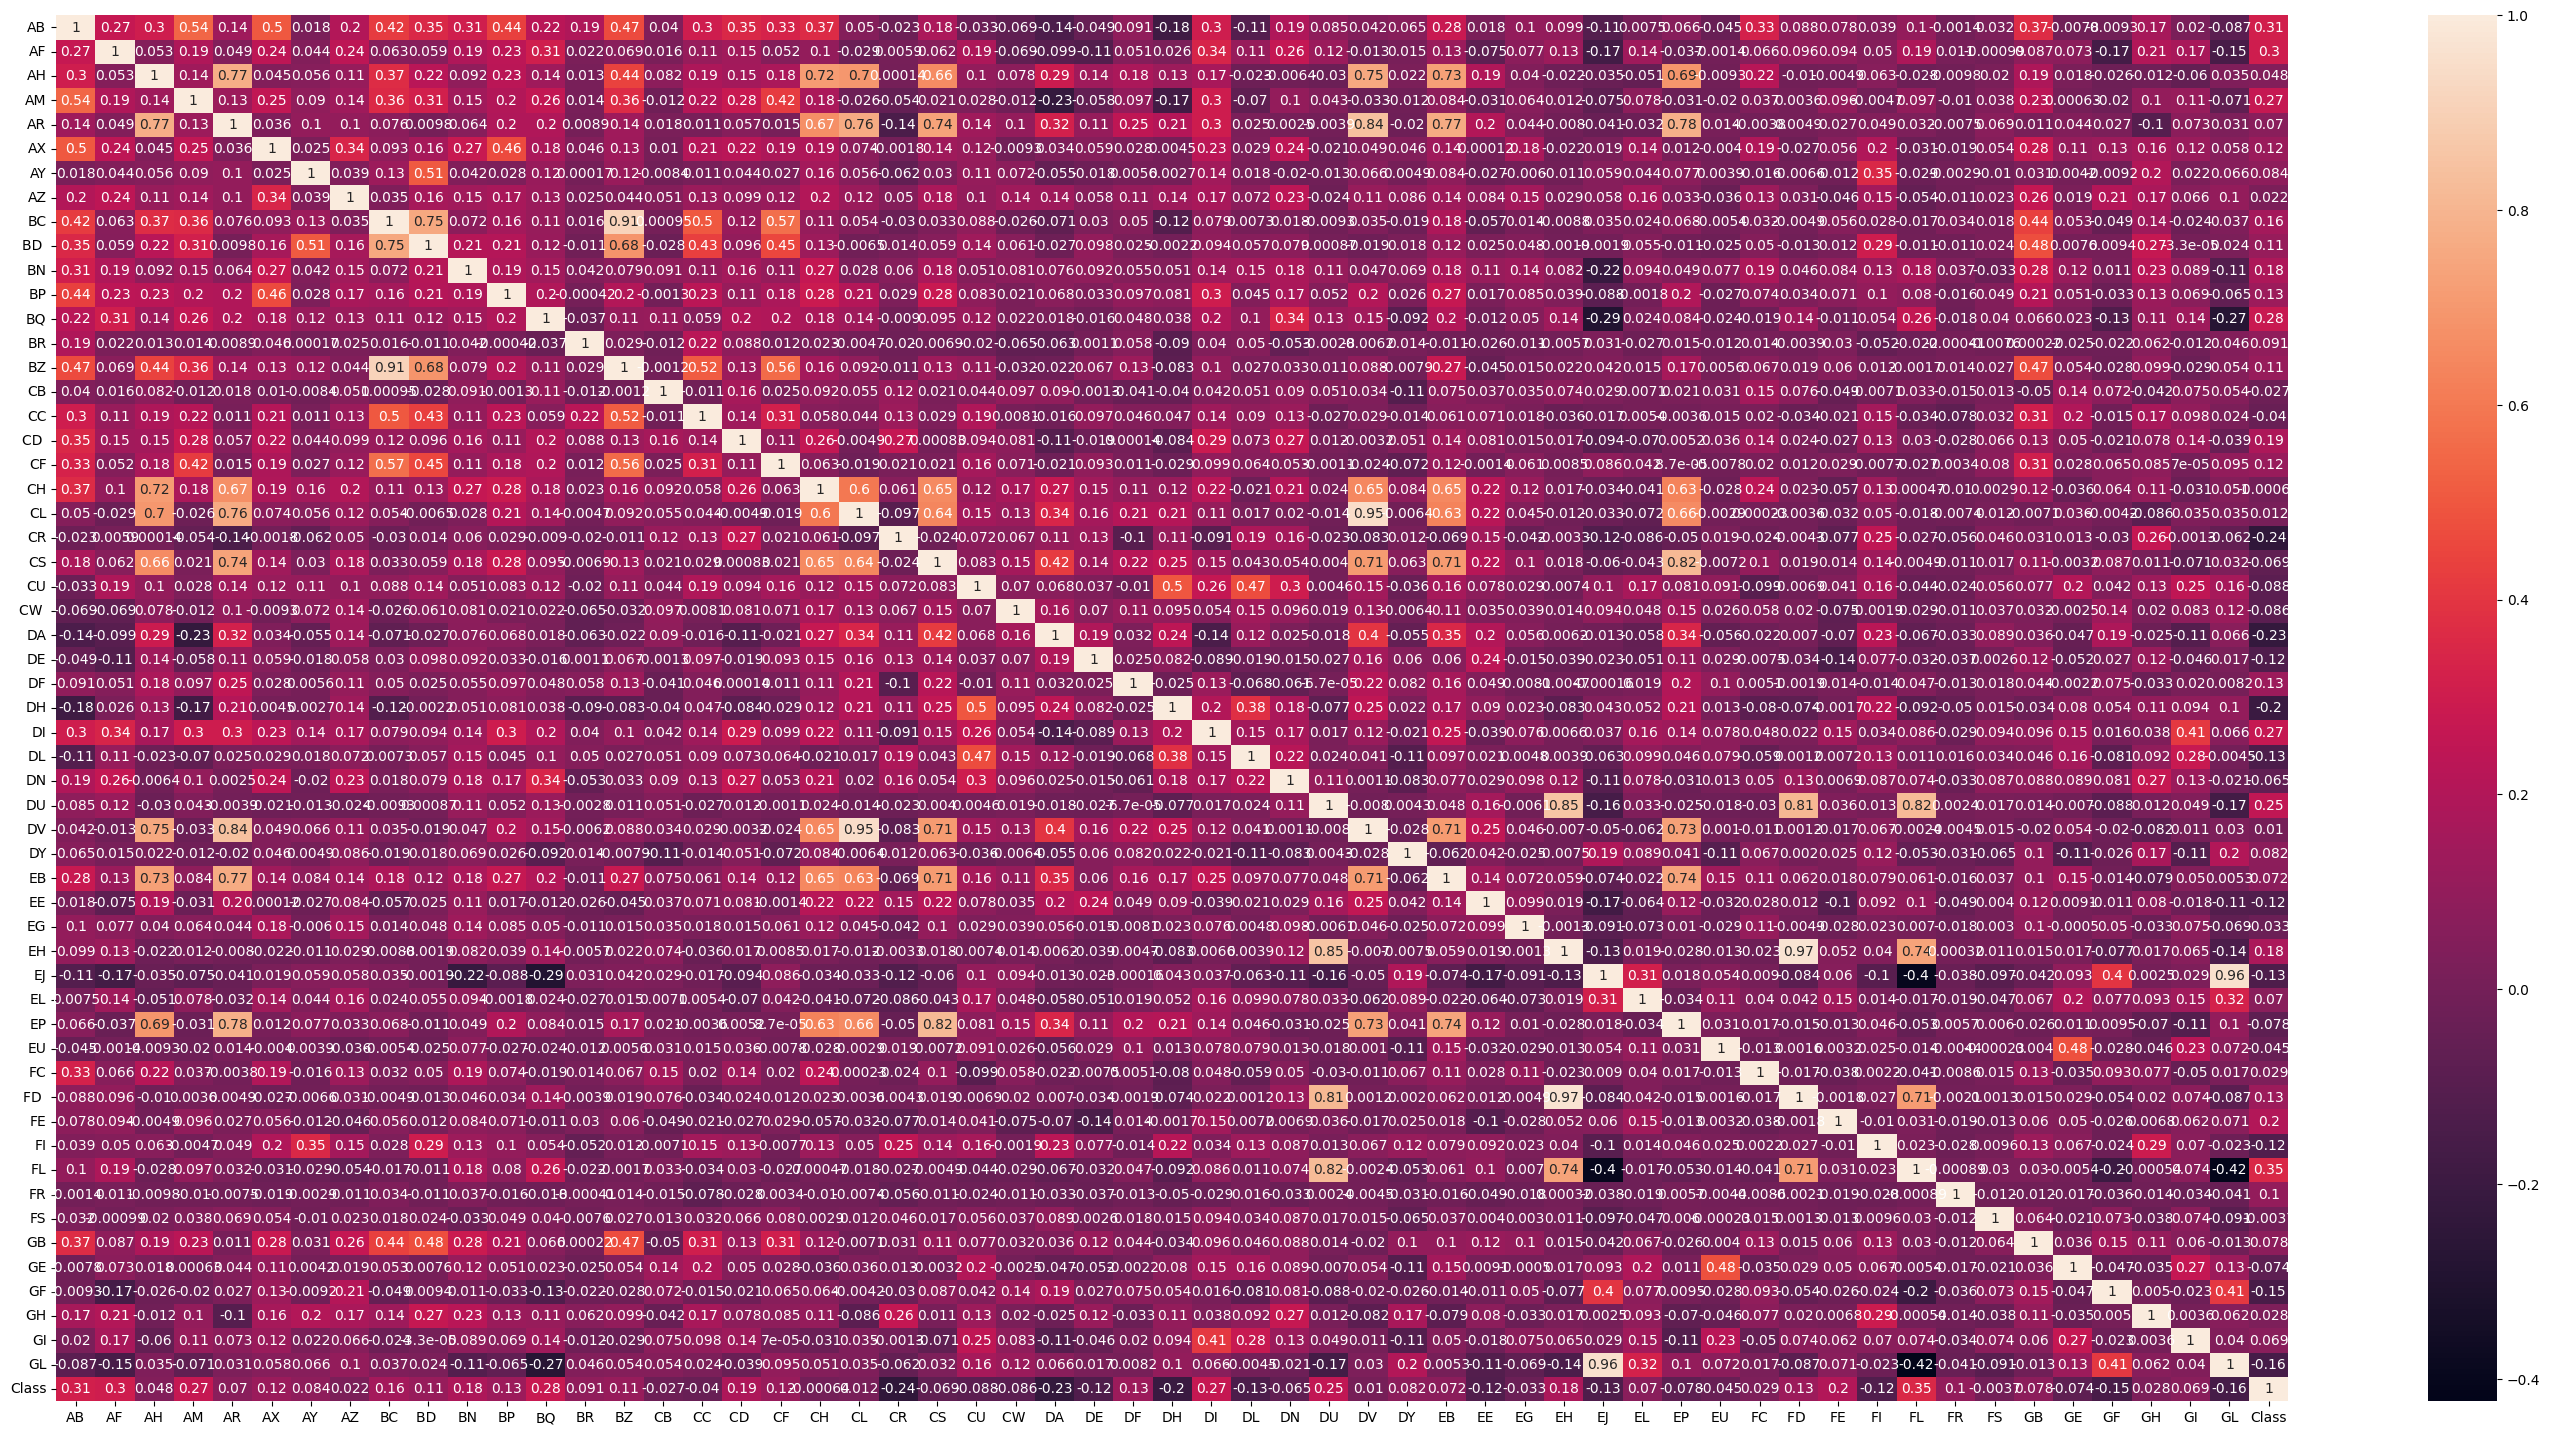

In [170]:
plt.figure(figsize=(36,18))
sns.heatmap(df.corr(numeric_only=True),annot=True);

In [90]:
df.shape

(553, 58)

## Modelling

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [143]:
from imblearn.over_sampling import SMOTE

In [136]:
df['EJ'].value_counts()

EJ
B    329
A    224
Name: count, dtype: int64

In [137]:
d={'B':0, 'A':1}

In [138]:
df['EJ']=df['EJ'].map(d)

In [139]:
train.shape

(548, 58)

In [140]:
train=df[:548]
test=df[548:]

In [141]:
x=train.drop(['Class','Id'], axis=1)
y=train[['Class']]

In [144]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [145]:
x.shape

(892, 56)

In [146]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=42)

In [147]:
b=BernoulliNB()
b.fit(x_train,y_train)
btahmin=b.predict(x_test)
accuracy_score(btahmin,y_test)

0.7206703910614525

In [148]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

         0.0       0.55      0.83      0.66        59
         1.0       0.89      0.67      0.76       120

    accuracy                           0.72       179
   macro avg       0.72      0.75      0.71       179
weighted avg       0.78      0.72      0.73       179



In [149]:
confusion_matrix(btahmin,y_test)

array([[49, 10],
       [40, 80]])

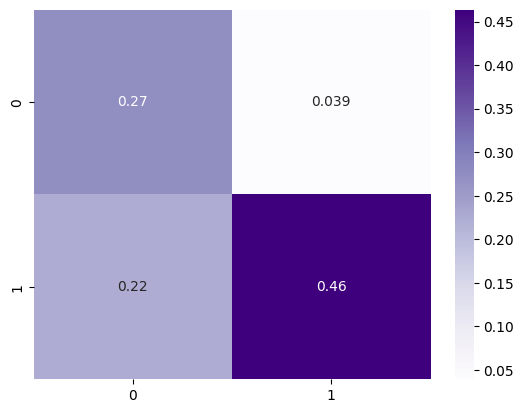

In [126]:
cm = confusion_matrix(btahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples');

In [41]:
y_scores = b.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

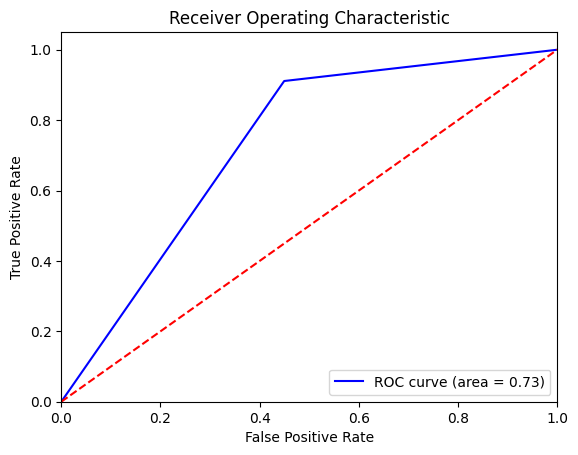

In [150]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [44]:
#K-Fold Cross Validation (with Random Forest Classifier)
x=train.drop(['Class','Id'], axis=1)
y=train[['Class']]

oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

model=BernoulliNB()

#K-fold cross validation (K=5)
kf=KFold(n_splits=5, shuffle=True, random_state=42)

#Calculating cross validation results
scores = cross_val_score(model, x, y, cv=kf, scoring='accuracy')

#Average of results
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")

Accuracy Scores: [0.72625698 0.60893855 0.62359551 0.6741573  0.66292135]
Mean Accuracy: 0.6591739376059256


In [151]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import  BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test(x, y):

    lr = LogisticRegression(max_iter=1000)
    b = BernoulliNB()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    svc = SVC()
    mlp = MLPClassifier(max_iter=1000)

    algos = [lr,  b,  knn, dt, rf, abc, gbc, svc, mlp]
    algo_names = ['Logistic Regression', 'BernoulliNB', 'K-Nearest Neighbors',
                  'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting', 'SVM', 'MLP Classifier']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []


    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'], index=algo_names)

    for algo in algos:
        algo.fit(x_train, y_train)
        y_pred = algo.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred, average='weighted'))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1-score'] = f1


    rtable = result.sort_values('Accuracy', ascending=False)
    return rtable


In [152]:
algo_test(x, y)

,Accuracy,Precision,Recall,F1-score
Random Forest,0.988827,0.988827,0.988827,0.988827
Gradient Boosting,0.988827,0.989070,0.988827,0.988825
AdaBoost,0.944134,0.945037,0.944134,0.944113
Decision Tree,0.899441,0.901208,0.899441,0.899309
Logistic Regression,0.877095,0.878842,0.877095,0.876980
MLP Classifier,0.804469,0.804848,0.804469,0.804433
K-Nearest Neighbors,0.770950,0.778575,0.770950,0.769220
BernoulliNB,0.720670,0.748130,0.720670,0.712312
SVM,0.692737,0.728145,0.692737,0.680899


## Test Data Prediction

In [39]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rftahmin=rf.predict(x_test)
accuracy_score(rftahmin,y_test)

0.9720670391061452

In [154]:
test1=test.drop(['Class','Id'],axis=1)

In [155]:
test1.shape

(5, 56)

In [156]:
test1

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [158]:
rf.fit(x,y)
tahmin=rf.predict(test1)

In [159]:
tahmin1=pd.DataFrame()
tahmin1['Id']=test['Id']
tahmin1['Class']=tahmin

In [162]:
tahmin1.sample(5)

,Id,Class
1,010ebe33f668,0.0
2,02fa521e1838,0.0
3,040e15f562a2,0.0
0,00eed32682bb,0.0
4,046e85c7cc7f,0.0


In [163]:
tahmin1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5 non-null      object 
 1   Class   5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes


In [164]:
tahmin1.to_csv('icr_submission.csv', index=False)

## Summary

Initially separate training and test data were merged. The features of the merged dataset were examined. A heatmap was drawn to visualize the correlation between the features. This helped to understand which features were related to each other. The dataset was re-separated for model training; training and test sets were created. A suitable machine learning model was selected. The model was trained using the training data. Confusion Matrix: A confusion matrix was created to evaluate the performance of the model. This allowed the correct and incorrect predictions to be visualized. K-Fold Cross Validation: K-fold cross validation was applied to increase the generalization ability of the model. SMOTE (Synthetic Minority Over-sampling Technique): SMOTE method was applied to eliminate the imbalance in the dataset. This increased the examples of the minority class, allowing the model to learn better and prevent overfitting. The model made predictions on the test dataset. The prediction results were saved in a suitable format.

This project involves the application of machine learning techniques to identify age-related health conditions. By carefully managing the training and testing processes, the model's performance was increased and the effects of imbalanced data were reduced. The results obtained could potentially make a significant contribution to the prediction of age-related health conditions.